In [1]:
import os
import folium
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

from utils import *

### 1. extract & transform fountains

In [2]:
fontaines = pd.read_csv(os.getenv("fountains"))

In [3]:
fontaines.columns = fontaines.columns.str.lower()

In [4]:
# create geodataframe
fontaines = gpd.GeoDataFrame(fontaines, geometry=gpd.points_from_xy(fontaines.longitude, fontaines.latitude))

In [5]:
fontaines = fontaines.set_crs('epsg:4326')

In [6]:
print(f"Fountains: {len(fontaines)}")

Fountains: 848


In [7]:
columns = ["date_installation", "remarque", "etat", "precision_localisation", "x", "y"]
fontaines = fontaines.drop(columns=columns)

In [8]:
fontaines.head(1)

,id,arrondissement,nom_parc_lieu,proximité_jeux_repère,intersection,longitude,latitude,geometry
0,1,Saint-Léonard,Delorme,Bocce,rue Loranger/rue Péguy,-73.589462,45.592012,POINT (-73.58946 45.59201)


<Axes: >

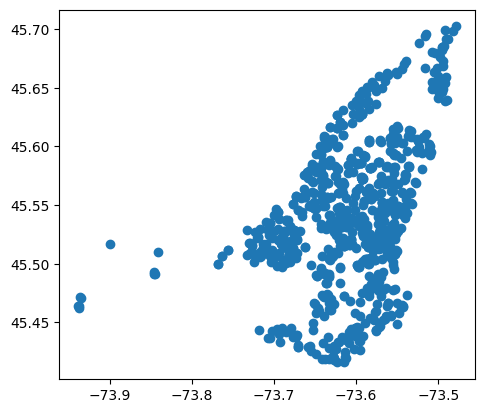

In [9]:
fontaines.plot()

### 2. extract & transform parcs

In [10]:
parcs = gpd.read_file(os.getenv("parcs"))

In [11]:
parcs.columns = parcs.columns.str.lower()

In [12]:
parcs = parcs.set_crs('epsg:4326')

In [13]:
print(f"Parcs: {len(parcs)}")

Parcs: 2218


In [14]:
columns = ["type", "lien", "num_index", "competence", "typo1", "typo2"]
parcs = parcs.drop(columns=columns)

In [15]:
parcs.head(1)

,objectid,nom,superficie,propriete,gestion,geometry
0,3477,Université Concordia - Campus Loyola,5.054930290035682,Institutionnel,Autre,"POLYGON ((-73.63623 45.45682, -73.63436 45.457..."


<Axes: >

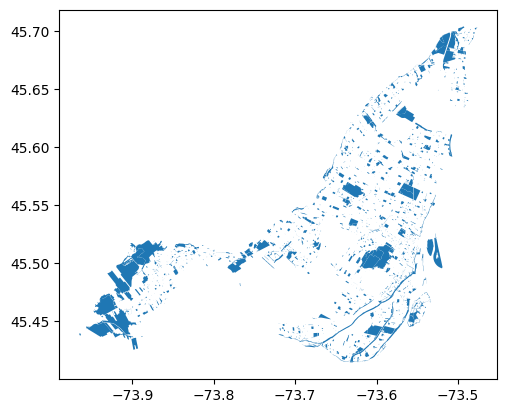

In [16]:
parcs.plot()

### 4. join fountains et parcs

In [17]:
join = gpd.sjoin(fontaines, parcs, predicate="within", how="inner")

In [18]:
join = join.rename(columns={"geometry": "fontaine_geom"})

In [19]:
join.head(1)

,id,arrondissement,nom_parc_lieu,proximité_jeux_repère,intersection,longitude,latitude,fontaine_geom,index_right,objectid,nom,superficie,propriete,gestion
0,1,Saint-Léonard,Delorme,Bocce,rue Loranger/rue Péguy,-73.589462,45.592012,POINT (-73.58946 45.59201),1592,5069,Delorme,11.804620299628045,Ville de Montréal,Saint-Léonard


In [20]:
parcs[parcs.index==1592]

,objectid,nom,superficie,propriete,gestion,geometry
1592,5069,Delorme,11.804620299628045,Ville de Montréal,Saint-Léonard,"POLYGON ((-73.58635 45.59128, -73.58637 45.591..."


In [21]:
merged = pd.merge(join, parcs[["objectid", "geometry"]], on="objectid")
merged = merged.rename(columns={'geometry': 'parc_geometry'})

In [66]:
# polygon_indices = join.index_right.unique()
# polygons_flt = polygons[polygons.index.isin(polygon_indices)]

In [67]:
# print(f"Parcs filtred: {len(polygons_flt)}")

In [68]:
# points_indices = join.id.unique()
# points_flt = points[points.id.isin(points_indices)]

In [69]:
# print(f"Fontaines filtred: {len(points_flt)}")

In [37]:
# joined = gpd.sjoin(bike, polygons, predicate="intersects", how="inner")

In [38]:
# Filter the resulting geodataframe to keep only the linestrings inside the polygons
# lines_flt = joined[joined.geometry.type == 'LineString']

In [39]:
# print(f"bikes filtred: {len(lines_flt)}")

### 4. save geodataframes into geojson file

In [32]:
polygons_flt.head(1)

,objectid,type,lien,nom,num_index,superficie,propriete,gestion,competence,typo1,typo2,geometry
2,3479,Parc,NaN,Maurice-Cullen,0137-000,0.542680858347123,Ville de Montréal,Côte-des-Neiges-Notre-Dame-de-Grâce,Arrondissement,Parc d'arrondissement,Parc de quartier,"POLYGON ((-73.61999 45.48310, -73.61999 45.483..."


In [43]:
polygons_flt.to_file("parcs.geojson", driver="GeoJSON")

In [33]:
points_flt.head(1)

,id,arrondissement,nom_parc_lieu,proximité_jeux_repère,intersection,etat,date_installation,remarque,precision_localisation,x,y,longitude,latitude,geometry
0,1,Saint-Léonard,Delorme,Bocce,rue Loranger/rue Péguy,NaN,NaN,NaN,orthophotographies,297819.89,5050237.94,-73.589462,45.592012,POINT (-73.58946 45.59201)


In [45]:
points_flt.drop(columns=["x", "y"]).to_file("fontaines.geojson", driver="GeoJSON")

In [34]:
lines_flt.head(1)

,id_cycl,id_trc,id2020,type_voie_r,type_voie2_r,longueur,nbr_voie,separateur_r,saisons4_r,protege_4s_r,...,type,lien,nom,num_index,superficie,propriete,gestion,competence,typo1,typo2
0,27803.0,0.0,233.0,7.0,0.0,116.0,2.0,,NON,NON,...,Parc linéaire,du,Réseau Vert,7000-000,2.9347499314747263,Ville de Montréal,Rosemont-La Petite-Patrie,Arrondissement,Parc d'arrondissement,Parc de quartier
